In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [10]:
fasta = '/projects/ps-yeolab3/ekofman/ReferenceData/hg38/cellranger-GRCh38-3.0.0/fasta/genome.fa'

In [11]:
%%bash

head -n1 /projects/ps-yeolab3/ekofman/ReferenceData/hg38/cellranger-GRCh38-3.0.0/fasta/genome.fa

>1 dna:chromosome chromosome:GRCh38:1:1:248956422:1 REF


# Load peak files to analyze

In [12]:
from glob import glob
#glob('/projects/ps-yeolab4/ekofman/Hugo/RPS2_Torin_Enzymes/sailor_outs_ai/*')

In [13]:
files_to_check = glob('/projects/ps-yeolab4/ekofman/Hugo/RPS2_Torin_Enzymes/sailor_outs_ai/*.bed') + glob('/projects/ps-yeolab4/ekofman/Hugo/RPS2_Torin_Enzymes/sailor_outs_ct/*.bed')


In [14]:
filtered_files_to_check = []
for f in files_to_check:
    if '0078' in f:
        filtered_files_to_check.append(f)
    elif 'ct' in f and 'APO' in f:
        filtered_files_to_check.append(f)
    elif 'ai' in f and ('8e' in f or '83' in f or 'MinA' in f):
        filtered_files_to_check.append(f)


In [15]:
from pyfaidx import Fasta

complements = {
    'A': 'T',
    'T': 'A',
    'C': 'G',
    'G': 'C',
    'N': 'N'
}

def reverse_complement(s):
    s = s.upper()
    new_s = ''
    
    try:
        for character in reversed(s):
            new_s = new_s + complements.get(character)
    except Exception as e:
        print(e)
        print(s)
        
    return new_s


def get_sequence(fasta_obj, chrom, start, end, strand):
    sequence = str(fasta_obj[str(chrom)][start:end])
    if strand == '-':
        sequence = reverse_complement(sequence)
    return sequence
    

In [10]:
fasta_obj = Fasta(fasta)
for f in filtered_files_to_check: 
    if '_1_' in f:
        filename = f.split('/')[-1].split('.tsv')[0]
        #print(filename)
        condition = filename.split('Aligned')[0]
        print(condition)
        
        df = pd.read_csv(f, sep='\t', names=['chrom', 'start', 'end', 'score', 'coverage', 'strand'])

        sequences = {}

        edit_type = 'ct'
        if '_ai' in f:
            edit_type = 'ai'

        print(len(df))
        for r in df.head(100000).iterrows():
            r = r[1]
            chrom = r.chrom
            start = r.start - 2
            end = r.end + 2
            strand = r.strand
            
            label = '{}-{}|{}:{}-{}({})'.format(condition, edit_type, chrom, start, end, strand)
            
            sequence = get_sequence(fasta_obj, chrom, start, end, strand)

            sequences[label] = sequence


        sequence_df = pd.DataFrame(pd.DataFrame(sequences, index=sequences.keys()).iloc[0])
        sequence_df.columns = ['sequence']

        sequence_df.to_csv('9.1_peaks_with_sequences/{}_{}.tsv'.format(filename, edit_type), sep='\t', index=True)

p0078_RESCUE_alone_R2_1_Torin
601264


KeyboardInterrupt: 

# GC-content

In [16]:
label_to_df = {}
for f in glob('9.1_peaks_with_sequences/*_1_*'):
    print(f)
    df = pd.read_csv(f, sep='\t', index_col=0)
    name = f.split('/')[-1].split('.tsv')[0]
    
    if 'Untreated' in name:
        name = name.replace('Torin', 'Untreated')
    elif 'Torin' in name:
        name = name.replace('Untreated', 'Torin')

    label_to_df[name] = df

    print('\t', name)

9.1_peaks_with_sequences/RPS2-APOBEC1_R2_1_TorinAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranked.bed_ct.tsv
	 RPS2-APOBEC1_R2_1_TorinAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranked.bed_ct
9.1_peaks_with_sequences/RPS2-p0078-RESCUE_R3_1_UntreatedAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranked.bed_ai.tsv
	 RPS2-p0078-RESCUE_R3_1_UntreatedAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranked.bed_ai
9.1_peaks_with_sequences/MinA_alone_R2_1_TorinAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranked.bed_ai.tsv
	 MinA_alone_R2_1_TorinAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranked.bed_ai
9.1_peaks_with_sequences/RPS2-p0078-RESCUE_R1_1_UntreatedAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranked.bed_a

In [17]:
label_to_df

{'RPS2-APOBEC1_R2_1_TorinAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranked.bed_ct':                                                   sequence
 RPS2-APOBEC1_R2_1_Torin-ct|1:629157-629162(+)        TACAC
 RPS2-APOBEC1_R2_1_Torin-ct|1:629182-629187(+)        CCCTC
 RPS2-APOBEC1_R2_1_Torin-ct|1:629184-629189(+)        CTCAC
 RPS2-APOBEC1_R2_1_Torin-ct|1:629187-629192(+)        ACCAC
 RPS2-APOBEC1_R2_1_Torin-ct|1:629207-629212(+)        AACAA
 ...                                                    ...
 RPS2-APOBEC1_R2_1_Torin-ct|1:42459980-42459985(+)    AACTA
 RPS2-APOBEC1_R2_1_Torin-ct|1:42459992-42459997(+)    AACCA
 RPS2-APOBEC1_R2_1_Torin-ct|1:42460010-42460015(+)    GACAG
 RPS2-APOBEC1_R2_1_Torin-ct|1:42460072-42460077(+)    GTCTT
 RPS2-APOBEC1_R2_1_Torin-ct|1:42460118-42460123(+)    AACAC
 
 [20000 rows x 1 columns],
 'RPS2-p0078-RESCUE_R3_1_UntreatedAligned.sortedByCoord.out.bam.combined.readfiltered.formatted.varfiltered.snpfiltered.ranke

In [76]:
def get_gc_content(s):
    num_g = s.count('G')
    num_c = s.count('C')

    num_at = len(s) - (num_g + num_c)
    assert(num_g + num_c + num_at == len(s))
    return (num_g + num_c) / len(s)

def get_a_content(s):
    num_a = s.count('A')
    return (num_a) / len(s)

def get_t_content(s):
    num_t = s.count('T')
    return (num_t) / len(s)

def get_c_content(s):
    num_c = s.count('C')
    return (num_c) / len(s)

def get_g_content(s):
    num_g = s.count('G')
    return (num_g) / len(s)

def get_center(s):
    #return s[2]
    return s[2]

def get_flank(s):
    #return s[0:2]+s[3:]
    return s[1]+s[3]

In [77]:
label_to_df_with_gc_content = {}
for label, df in label_to_df.items():
    df['GC_content'] = df.sequence.fillna('N').apply(get_gc_content)
    df['A_content'] = df.sequence.fillna('N').apply(get_a_content)
    df['T_content'] = df.sequence.fillna('N').apply(get_t_content)
    df['C_content'] = df.sequence.fillna('N').apply(get_c_content)
    df['G_content'] = df.sequence.fillna('N').apply(get_g_content)
    df['center'] = df.sequence.astype(str).apply(get_center)
    df['flanking'] = df.sequence.astype(str).apply(get_flank)
    
    if '78' in label:
        overall_label = label.split('Aligned')[0] + label.split("bed")[1]
    else:
        overall_label = label.split('Aligned')[0]

    label_to_df_with_gc_content[overall_label] = df

In [78]:
label_to_df_with_gc_content

{'RPS2-APOBEC1_R2_1_Torin':                                                   sequence  GC_content  \
 RPS2-APOBEC1_R2_1_Torin-ct|1:629157-629162(+)        TACAC         0.4   
 RPS2-APOBEC1_R2_1_Torin-ct|1:629182-629187(+)        CCCTC         0.8   
 RPS2-APOBEC1_R2_1_Torin-ct|1:629184-629189(+)        CTCAC         0.6   
 RPS2-APOBEC1_R2_1_Torin-ct|1:629187-629192(+)        ACCAC         0.6   
 RPS2-APOBEC1_R2_1_Torin-ct|1:629207-629212(+)        AACAA         0.2   
 ...                                                    ...         ...   
 RPS2-APOBEC1_R2_1_Torin-ct|1:42459980-42459985(+)    AACTA         0.2   
 RPS2-APOBEC1_R2_1_Torin-ct|1:42459992-42459997(+)    AACCA         0.4   
 RPS2-APOBEC1_R2_1_Torin-ct|1:42460010-42460015(+)    GACAG         0.6   
 RPS2-APOBEC1_R2_1_Torin-ct|1:42460072-42460077(+)    GTCTT         0.4   
 RPS2-APOBEC1_R2_1_Torin-ct|1:42460118-42460123(+)    AACAC         0.4   
 
                                                    A_content  T_conten

In [79]:
from collections import defaultdict

to_combine = defaultdict(lambda:[])

for b in [c for c in label_to_df_with_gc_content.keys() if '78' in c]:
    if 'ct' in b:
        prefix = b.split('_ct')[0]
    elif 'ai' in b:
        prefix = b.split('_ai')[0]
      
    to_combine[prefix].append(b)

for k, cols in to_combine.items():
    label_to_df_with_gc_content[k] = pd.concat([label_to_df_with_gc_content[cols[0]], label_to_df_with_gc_content[cols[1]]])

In [80]:
for k in [c for c in label_to_df_with_gc_content if '78' in c]:
    if 'ai' in k or 'ct' in k:
        del label_to_df_with_gc_content[k]

In [81]:
label_to_df_with_gc_content.keys()

dict_keys(['RPS2-APOBEC1_R2_1_Torin', 'MinA_alone_R2_1_Torin', 'ABE8e_alone_R3_1_Untreated', 'APOBEC1_alone_R1_1_Torin', 'ABE8e_alone_R1_1_Untreated', 'RPS2-MinA_R2_1_Untreated', 'RPS2-MinA_R3_1_Untreated', 'RPS2-ABE83_R3_1_Untreated', 'RPS2-APOBE_R3_1_Untreated', 'RPS2-ABE83_R2_1_Torin', 'ABE8e_alone_R3_1_Torin', 'ABE8e_alone_R2_1_Torin', 'RPS2-MinA_R1_1_Torin', 'RPS2-MinA_R3_1_Torin', 'APOBEC1_alone_R2_1_Untreated', 'MinA_alone_R1_1_Untreated', 'ABE8e_alone_R2_1_Untreated', 'RPS2-APOBE_R1_1_Untreated', 'RPS2-MinA_R2_1_Torin', 'RPS2-ABE83_R1_1_Untreated', 'APOBEC1_alone_R1_1_Untreated', 'RPS2-MinA_R1_1_Untreated', 'APOBEC1_alone_R3_1_Untreated', 'MinA_alone_R3_1_Untreated', 'RPS2-ABE83_R1_1_Torin', 'RPS2-ABE83_R2_1_Untreated', 'MinA_alone_R1_1_Torin', 'RPS2-APOBEC1_R3_1_Torin', 'MinA_alone_R3_1_Torin', 'RPS2-APOBE_R2_1_Untreated', 'APOBEC1_alone_R3_1_Torin', 'RPS2-APOBEC1_R1_1_Torin', 'APOBEC1_alone_R2_1_Torin', 'ABE8e_alone_R1_1_Torin', 'RPS2-ABE83_R3_1_Torin', 'MinA_alone_R2_1_Untre

# PCA and loadings

In [82]:
counts_df_list = []
for label,df in label_to_df_with_gc_content.items():
    counts_df = pd.DataFrame(df.groupby('flanking').count().center)
    counts_df.columns = [label]
    counts_df = counts_df.sort_index()
    counts_df_list.append(counts_df)


In [83]:
overall_counts_df = pd.concat(counts_df_list, axis=1).fillna(0)

In [84]:
overall_counts_df

,RPS2-APOBEC1_R2_1_Torin,MinA_alone_R2_1_Torin,ABE8e_alone_R3_1_Untreated,APOBEC1_alone_R1_1_Torin,ABE8e_alone_R1_1_Untreated,RPS2-MinA_R2_1_Untreated,RPS2-MinA_R3_1_Untreated,RPS2-ABE83_R3_1_Untreated,RPS2-APOBE_R3_1_Untreated,RPS2-ABE83_R2_1_Torin,...,RPS2-p0078-RESCUE_R1_1_Untreated,p0078_RESCUE_alone_R2_1_Torin,RPS2-p0078-RESCUE_R1_1_Torin,p0078_RESCUE_alone_R2_1_Untreated,p0078_RESCUE_alone_R1_1_Torin,RPS2-p0078-RESCUE_R2_1_Torin,p0078_RESCUE_alone_R3_1_Untreated,RPS2-p0078-RESCUE_R3_1_Torin,p0078_RESCUE_alone_R3_1_Torin,p0078_RESCUE_alone_R1_1_Untreated
flanking,,,,,,,,,,,,,,,,,,,,,
AA,3529,1455,954,3679,958,7093,1463,4742,3368,864,...,2697,8269,7983,2710,2813,2569,2639,2558,3219,7691
AC,2079,821,698,1669,684,4061,813,3685,1943,746,...,2710,7283,8015,2530,2508,2763,2577,2847,2662,7532
AG,924,1637,971,866,1035,8531,1716,5275,910,1053,...,4343,17017,18315,3997,3906,4246,4098,4399,4193,18203
AT,3177,957,584,3763,598,4424,823,3177,2999,583,...,1616,4747,4287,1776,1791,1583,1759,1583,1923,4398
CA,840,1163,1437,758,1448,5698,1079,7326,826,1427,...,2386,6303,5668,2609,2615,2436,2639,2410,2640,5893
CC,472,984,1805,497,1684,4870,843,7981,550,2055,...,2891,7060,7673,2718,2730,2862,2538,2892,2273,7298
CG,294,2280,2291,298,2131,10816,2063,11119,272,2701,...,4688,16208,18044,4218,3948,4859,4152,4781,3461,17505
CT,604,661,1290,582,1242,3680,713,6530,739,1327,...,1801,4011,3747,2017,1914,1777,1881,1709,1867,3875
GA,754,1179,945,784,973,6399,1469,5901,761,1168,...,1807,5519,4204,2172,2154,1751,2179,1791,2295,4979


In [85]:
flanking_combined_df = overall_counts_df/overall_counts_df.sum()

In [86]:
flanking_combined_df

,RPS2-APOBEC1_R2_1_Torin,MinA_alone_R2_1_Torin,ABE8e_alone_R3_1_Untreated,APOBEC1_alone_R1_1_Torin,ABE8e_alone_R1_1_Untreated,RPS2-MinA_R2_1_Untreated,RPS2-MinA_R3_1_Untreated,RPS2-ABE83_R3_1_Untreated,RPS2-APOBE_R3_1_Untreated,RPS2-ABE83_R2_1_Torin,...,RPS2-p0078-RESCUE_R1_1_Untreated,p0078_RESCUE_alone_R2_1_Torin,RPS2-p0078-RESCUE_R1_1_Torin,p0078_RESCUE_alone_R2_1_Untreated,p0078_RESCUE_alone_R1_1_Torin,RPS2-p0078-RESCUE_R2_1_Torin,p0078_RESCUE_alone_R3_1_Untreated,RPS2-p0078-RESCUE_R3_1_Torin,p0078_RESCUE_alone_R3_1_Torin,p0078_RESCUE_alone_R1_1_Untreated
flanking,,,,,,,,,,,,,,,,,,,,,
AA,0.17645,0.07275,0.04770,0.18395,0.04790,0.07093,0.07315,0.04742,0.16840,0.04320,...,0.067425,0.068908,0.066525,0.067750,0.070325,0.064225,0.065975,0.063950,0.080475,0.064092
AC,0.10395,0.04105,0.03490,0.08345,0.03420,0.04061,0.04065,0.03685,0.09715,0.03730,...,0.067750,0.060692,0.066792,0.063250,0.062700,0.069075,0.064425,0.071175,0.066550,0.062767
AG,0.04620,0.08185,0.04855,0.04330,0.05175,0.08531,0.08580,0.05275,0.04550,0.05265,...,0.108575,0.141808,0.152625,0.099925,0.097650,0.106150,0.102450,0.109975,0.104825,0.151692
AT,0.15885,0.04785,0.02920,0.18815,0.02990,0.04424,0.04115,0.03177,0.14995,0.02915,...,0.040400,0.039558,0.035725,0.044400,0.044775,0.039575,0.043975,0.039575,0.048075,0.036650
CA,0.04200,0.05815,0.07185,0.03790,0.07240,0.05698,0.05395,0.07326,0.04130,0.07135,...,0.059650,0.052525,0.047233,0.065225,0.065375,0.060900,0.065975,0.060250,0.066000,0.049108
CC,0.02360,0.04920,0.09025,0.02485,0.08420,0.04870,0.04215,0.07981,0.02750,0.10275,...,0.072275,0.058833,0.063942,0.067950,0.068250,0.071550,0.063450,0.072300,0.056825,0.060817
CG,0.01470,0.11400,0.11455,0.01490,0.10655,0.10816,0.10315,0.11119,0.01360,0.13505,...,0.117200,0.135067,0.150367,0.105450,0.098700,0.121475,0.103800,0.119525,0.086525,0.145875
CT,0.03020,0.03305,0.06450,0.02910,0.06210,0.03680,0.03565,0.06530,0.03695,0.06635,...,0.045025,0.033425,0.031225,0.050425,0.047850,0.044425,0.047025,0.042725,0.046675,0.032292
GA,0.03770,0.05895,0.04725,0.03920,0.04865,0.06399,0.07345,0.05901,0.03805,0.05840,...,0.045175,0.045992,0.035033,0.054300,0.053850,0.043775,0.054475,0.044775,0.057375,0.041492


In [87]:
flanking_combined_df = flanking_combined_df[[c for c in flanking_combined_df.columns if 'alone' not in c]]

In [88]:
flanking_combined_df

,RPS2-APOBEC1_R2_1_Torin,RPS2-MinA_R2_1_Untreated,RPS2-MinA_R3_1_Untreated,RPS2-ABE83_R3_1_Untreated,RPS2-APOBE_R3_1_Untreated,RPS2-ABE83_R2_1_Torin,RPS2-MinA_R1_1_Torin,RPS2-MinA_R3_1_Torin,RPS2-APOBE_R1_1_Untreated,RPS2-MinA_R2_1_Torin,...,RPS2-ABE83_R2_1_Untreated,RPS2-APOBEC1_R3_1_Torin,RPS2-APOBE_R2_1_Untreated,RPS2-APOBEC1_R1_1_Torin,RPS2-ABE83_R3_1_Torin,RPS2-p0078-RESCUE_R3_1_Untreated,RPS2-p0078-RESCUE_R1_1_Untreated,RPS2-p0078-RESCUE_R1_1_Torin,RPS2-p0078-RESCUE_R2_1_Torin,RPS2-p0078-RESCUE_R3_1_Torin
flanking,,,,,,,,,,,,,,,,,,,,,
AA,0.17645,0.07093,0.07315,0.04742,0.16840,0.04320,0.07080,0.06890,0.18685,0.06900,...,0.04240,0.17795,0.17720,0.20405,0.04829,0.063100,0.067425,0.066525,0.064225,0.063950
AC,0.10395,0.04061,0.04065,0.03685,0.09715,0.03730,0.04195,0.04005,0.09470,0.04255,...,0.03695,0.10090,0.09335,0.09625,0.03649,0.066875,0.067750,0.066792,0.069075,0.071175
AG,0.04620,0.08531,0.08580,0.05275,0.04550,0.05265,0.08375,0.08205,0.04315,0.07865,...,0.05605,0.04440,0.04190,0.04600,0.05334,0.098700,0.108575,0.152625,0.106150,0.109975
AT,0.15885,0.04424,0.04115,0.03177,0.14995,0.02915,0.04805,0.04705,0.17290,0.04710,...,0.03070,0.16170,0.16150,0.18205,0.03165,0.039550,0.040400,0.035725,0.039575,0.039575
CA,0.04200,0.05698,0.05395,0.07326,0.04130,0.07135,0.05440,0.05600,0.03535,0.05410,...,0.07230,0.03405,0.03850,0.02985,0.07345,0.062250,0.059650,0.047233,0.060900,0.060250
CC,0.02360,0.04870,0.04215,0.07981,0.02750,0.10275,0.04555,0.05020,0.02150,0.04560,...,0.10430,0.02285,0.02510,0.01665,0.07609,0.081025,0.072275,0.063942,0.071550,0.072300
CG,0.01470,0.10816,0.10315,0.11119,0.01360,0.13505,0.10285,0.10995,0.01195,0.10225,...,0.13595,0.01280,0.01220,0.00955,0.10671,0.125900,0.117200,0.150367,0.121475,0.119525
CT,0.03020,0.03680,0.03565,0.06530,0.03695,0.06635,0.03475,0.03545,0.02885,0.03655,...,0.06665,0.03130,0.03030,0.02380,0.06408,0.048025,0.045025,0.031225,0.044425,0.042725
GA,0.03770,0.06399,0.07345,0.05901,0.03805,0.05840,0.06450,0.06140,0.03675,0.06335,...,0.05885,0.03760,0.03880,0.03560,0.05765,0.046875,0.045175,0.035033,0.043775,0.044775


In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pcs = ['PC1', 'PC2', 'PC3', 'PC4']
x = StandardScaler().fit_transform(flanking_combined_df.T)
pca = PCA(n_components=len(pcs))
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = pcs)
principalDf.index = flanking_combined_df.columns
var_explained = pd.DataFrame(pca.explained_variance_ratio_, pcs)

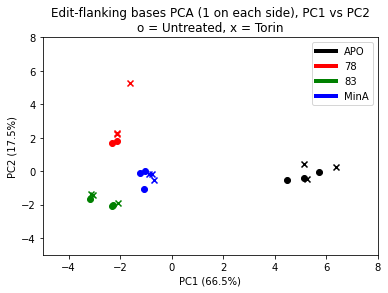

In [93]:
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt

num_flanking = 1

color_map = {
    'APO': 'black',
    '78': 'red',
    '8e': 'green',
    '83': 'green',
    'MinA': 'blue'
}

shape_map = {
    'alone': 'o',
    'fusion': 'x',
    'Untreated': 'o',
    'Torin': 'x'
}


custom_lines = []
legend = []
del color_map['8e']
for enzyme, color in color_map.items():
    custom_lines.append(Line2D([0], [0], color=color, lw=4))
    legend.append(enzyme)
    
    
label_color = []
pc_comps = [['PC1', 'PC2']]
for pc_comp in pc_comps:
    plt.figure()
    for r in principalDf.iterrows():
        pc_x = r[1][pc_comp[0]]
        pc_y = r[1][pc_comp[1]]
    
        label = r[0]

        for key, value in color_map.items():
            if key in label:
                color = value
                continue

        #if 'Untreated' in label:
        #   continue
        
        if 'alone' in label:
            continue
            
        if 'Torin' in label:
            shape = shape_map.get('Torin')
        else:
            shape = shape_map.get('Untreated')
        
       
        plt.scatter(pc_x, pc_y, color=color, marker=shape)
        
        label_color.append('{}_{}'.format(label, color))
    #for v in (sorted(label_color)):
    #    print(v)
    
    x_var = round(float(var_explained.loc[pc_comp[0]]), 3) * 100
    y_var = round(float(var_explained.loc[pc_comp[1]]), 3) * 100

    plt.xlabel('{} ({}%)'.format(pc_comp[0], x_var))
    plt.ylabel('{} ({}%)'.format(pc_comp[1], y_var))
    #plt.xlim(-15, 21)
    #plt.ylim(-15, 21)
    plt.xlim(-5, 8)
    plt.ylim(-5, 8)
    plt.title("Edit-flanking bases PCA ({} on each side), {} vs {}\no = Untreated, x = Torin".format(num_flanking, 
                                                                                                     pc_comp[0], 
                                                                                                                           pc_comp[1]))
    plt.legend(custom_lines, legend)
    
    plt.savefig('images/svgs/flanking_region_plots/RPS2_edit_{}_flanking_bases_pca.svg'.format(num_flanking),
                            bbox_inches='tight'
               )



In [94]:
loadings = pd.DataFrame(pca.components_.T, columns=pcs, index=flanking_combined_df.index)

In [95]:
top_pc1 = loadings.sort_values('PC1').tail(2)
bottom_pc1 = loadings.sort_values('PC1').head(2)
top_pc2 = loadings.sort_values('PC2').tail(2)
bottom_pc2 = loadings.sort_values('PC2').head(2)

In [96]:
informative_flanks = sorted(set(list(top_pc1.index) + list(bottom_pc1.index) + list(top_pc2.index) + list(bottom_pc2.index)))

In [97]:
#combine replicates
from collections import defaultdict

overall_label_to_cols = defaultdict(lambda:[])

for c in overall_counts_df.columns:

    if 'R1' in c:
        overall_label = c.split('_R1')[0] + '_' + c.split('_')[-1]
    elif 'R2' in c:
        overall_label = c.split('_R2')[0] + '_' + c.split('_')[-1]
    elif 'R3' in c:
        overall_label = c.split('_R3')[0] + '_' + c.split('_')[-1]
    overall_label_to_cols[overall_label].append(c)

In [98]:
summed_counts = []
for k, vals in overall_label_to_cols.items():
    summed_counts_for_overall_label = pd.DataFrame(overall_counts_df[vals].sum(axis=1), columns=[k])
    summed_counts.append(summed_counts_for_overall_label)
summed_counts_df = pd.concat(summed_counts, axis=1)

In [100]:
fraction_counts_df = summed_counts_df/summed_counts_df.sum()

Index(['RPS2-APOBEC1_Torin', 'RPS2-MinA_Untreated', 'RPS2-ABE83_Untreated',
       'RPS2-APOBE_Untreated', 'RPS2-ABE83_Torin', 'RPS2-MinA_Torin',
       'RPS2-p0078-RESCUE_Untreated', 'RPS2-p0078-RESCUE_Torin'],
      dtype='object')


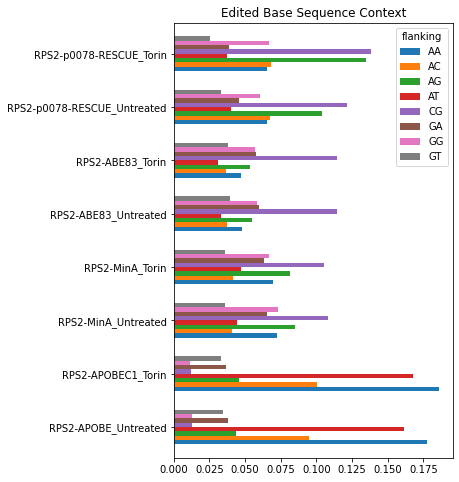

In [101]:
base_distributions = fraction_counts_df.loc[informative_flanks][[c for c in fraction_counts_df if 'alone' not in c]].T
print(base_distributions.index)
base_distributions.loc[['RPS2-APOBE_Untreated', 'RPS2-APOBEC1_Torin', 'RPS2-MinA_Untreated', 'RPS2-MinA_Torin',
                    'RPS2-ABE83_Untreated', 'RPS2-ABE83_Torin', 'RPS2-p0078-RESCUE_Untreated', 'RPS2-p0078-RESCUE_Torin']].plot(
    kind='barh', figsize=(5, 8), width=0.65)
plt.title("Edited Base Sequence Context")
plt.savefig('images/svgs/flanking_region_plots/RPS2_top_informative_edited_base_sequence_context_barplots_{}.svg'.format(num_flanking),
            bbox_inches='tight'
           )

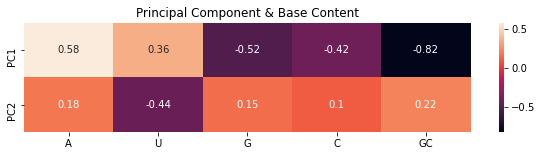

In [102]:
import seaborn as sns

def get_gc_content(r):
    kmer = r.name
    return (kmer.count('G') + kmer.count('C'))/len(kmer)
    
def get_at_content(r):
    kmer = r.name
    return (kmer.count('A') + kmer.count('T'))/len(kmer)

def get_t_content(r):
    kmer = r.name
    return (kmer.count('T'))/len(kmer)

def get_a_content(r):
    kmer = r.name
    return (kmer.count('A'))/len(kmer)

def get_g_content(r):
    kmer = r.name
    return (kmer.count('G'))/len(kmer)

def get_c_content(r):
    kmer = r.name
    return (kmer.count('C'))/len(kmer)

loadings['GC'] = loadings.apply(get_gc_content, axis=1)

loadings['A'] = loadings.apply(get_a_content, axis=1)
loadings['C'] = loadings.apply(get_c_content, axis=1)
loadings['U'] = loadings.apply(get_t_content, axis=1)
loadings['G'] = loadings.apply(get_g_content, axis=1)
pc_correlations = loadings.corr().loc[['PC1', 'PC2']][['A', 'U', 'G', 'C', 'GC']]

plt.figure(figsize=(10, 2))
sns.heatmap(pc_correlations, annot=True)
plt.title("Principal Component & Base Content")
plt.savefig("images/svgs/flanking_region_plots/RPS2_pc_corr_with_flanking_base_features_{}.svg".format(num_flanking),
                        bbox_inches='tight'
           )

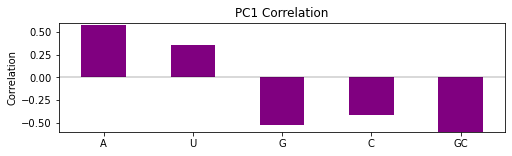

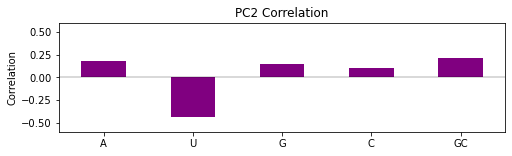

In [103]:
for pc in ['PC1', 'PC2']:
    plt.figure(figsize=(8, 2))
    pc_correlations.loc[pc].plot(kind='bar', color='purple')
    plt.ylabel("Correlation")
    plt.title("{} Correlation".format(pc))
    plt.axhline(0, color='k', linewidth=.3)
    plt.xticks(rotation=0)
    plt.ylim(-.6, .6)
    plt.savefig("images/svgs/flanking_region_plots/RPS2_{}_corr_with_flanking_base_features_barplot_{}.svg".format(num_flanking, pc),
                        bbox_inches='tight'
               )
    